# Student Performance Indicator

### Life Cycle Of Machine Learning Project

* Understand the Problem Statement
* Data Collection
* Data Checks to Performs
* Exploratory Data Analysis
* Data Pre Processing
* Model Training
* Choose Best Model

##  1) The Problem Statement

   * The Project understands how the student performance(test score's) is affected by other variable such as gender , ethnicity , parental level of education, lunch and test preparation course.

## 2) Data Collection

* Dataset Score - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The Data consists of 8 column and 1000 rows

## 2.1 Import Data and Required Packages


### Importing Pandas, Numpy ,Seaborn ,Matplotlib and warningfilter

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [38]:
df = pd.read_csv("./data/stud.csv")

### Show Top 5 Records

In [39]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [40]:
df.shape

(1000, 8)

## 2.2 Dataset Information

* gender: sex of students ->(Male/Female)
* race/ethnicity: ethnicity of students -> (Groups A,B,C,D)
* parental level of education: parents final education (bachelor's degree,some college, some college,master's degree,high school)
* lunch : having the lunch before test (test or free/reduced)
* test preparation course: complete or not complete before test
* math score
* reading score
* writing score

## 3 Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

### 3.1 check missing values

In [41]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 3.2 Check Duplicates 


In [42]:
df.duplicated().sum()

np.int64(0)

### Check the data type

In [43]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

### Check the number of unique values of each column

In [44]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check Statistic Dataset

In [45]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights

### Conclusion

* mean values of all in close : 66 to 69
* standard deviation are also close : 14.60 to 15.19
* While minimum values is 10 and maximum values are same 100 : min reading = 17 and min writing 15

## 3.7 Exploratory Data

In [46]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
# Print the unique categories in the "gender" column
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique)

# Print the unique categories in the "race_ethnicity" column
print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique)

# Print the unique categories in the "parental level of education" column
print("Categories in 'parental level of education' variable:  ",end=" ")
print(df['parental_level_of_education'].unique)

# Print the unique categories in the "lunch" column
print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique)

# Print the unique categories in the "test preparation course" column
print("Categories in 'test preparation course' variable: ",end="")
print(df['test_preparation_course'].unique)

Categories in 'gender' variable:   <bound method Series.unique of 0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object>
Categories in 'race_ethnicity' variable:   <bound method Series.unique of 0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race_ethnicity, Length: 1000, dtype: object>
Categories in 'parental level of education' variable:   <bound method Series.unique of 0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental_level_of_education, Length: 1000, dtype: object>
Categories

In [48]:

# identify the numerical type feature  (exclude data type)
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

## identify the categorical type feature (data type)
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print the numerical type feature
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))

#print the categorical type feature
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [49]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


## 3.8 Adding Columns for "Total Score" and "Average"


In [50]:
# Merge 3 feature into 1 feature
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']

# Average of total score
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [51]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()
                  
                  
print(f'Number of students with full marrk in Maths: {math_full}')
print(f'Number of students with full marrk in Writing: {writing_full}')
print(f'Number of students with full marrk in Reading: {reading_full}')

Number of students with full marrk in Maths: 7
Number of students with full marrk in Writing: 14
Number of students with full marrk in Reading: 17


In [52]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count() 

print(f'Number of students with less than 20 marks in maths: {math_less_20}')
print(f'Number of students with less than 20 marks in write: {writing_less_20}')
print(f'Number of students with less than 20 marks in read: {reading_less_20}')

Number of students with less than 20 marks in maths: 4
Number of students with less than 20 marks in write: 3
Number of students with less than 20 marks in read: 1


### Insights

* From above values we get students have performed the worst in maths
* Best Performance is in reading section

## 4 Exploring Data (Visualization)

### 4.1 Visualize average score distribution to make some conclusion

* Histogram
* Kernel Distribution Function (kdf)


### 4.1.1 Histogram & KDE

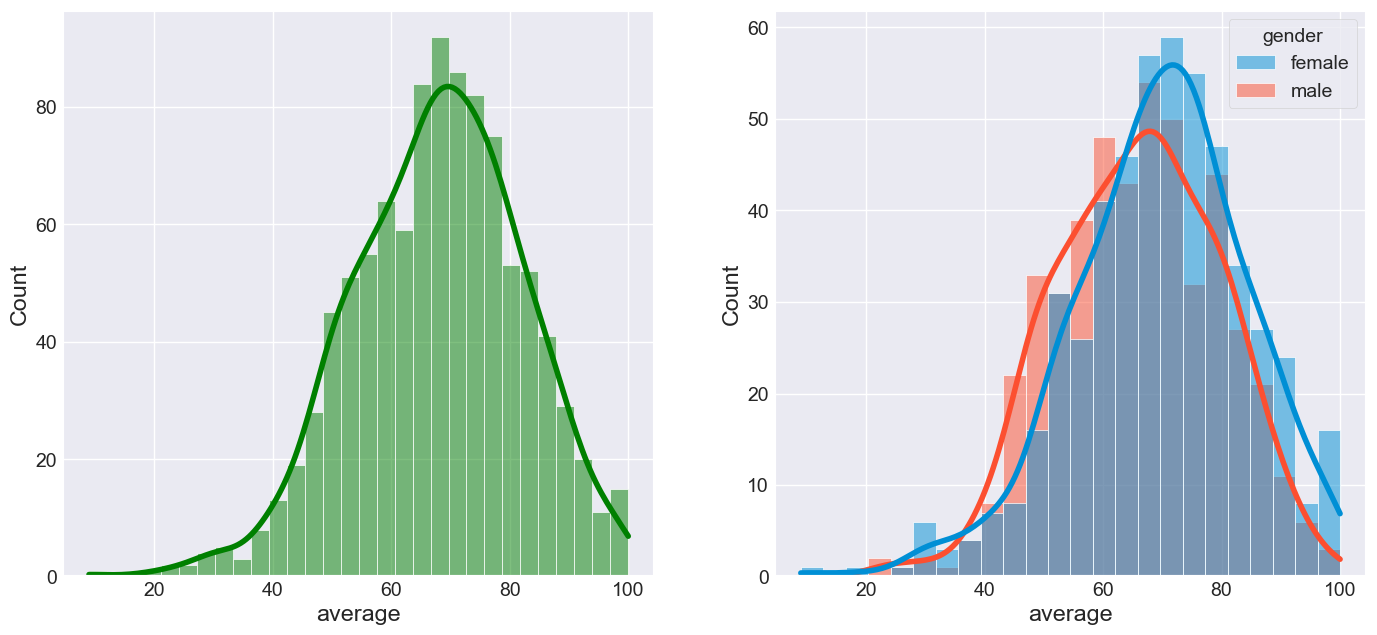

In [53]:
# Create a figure with 1 row and 2 column of subplots and setting figure size
fig, axs = plt.subplots(1,2,figsize=(15,7))

#First subplot: Histogram of 'average' with 30 bins and KDE (kernel Density Estimate)
plt.subplot(121)


sns.histplot(data=df,x='average',bins=30,kde=True,color='g')

plt.subplot(122)

#
sns.histplot(data=df,x='average',kde=True,hue='gender')

#
plt.show()


### Insights

* Female students tend to perform well perform well then male students

<function matplotlib.pyplot.show(close=None, block=None)>

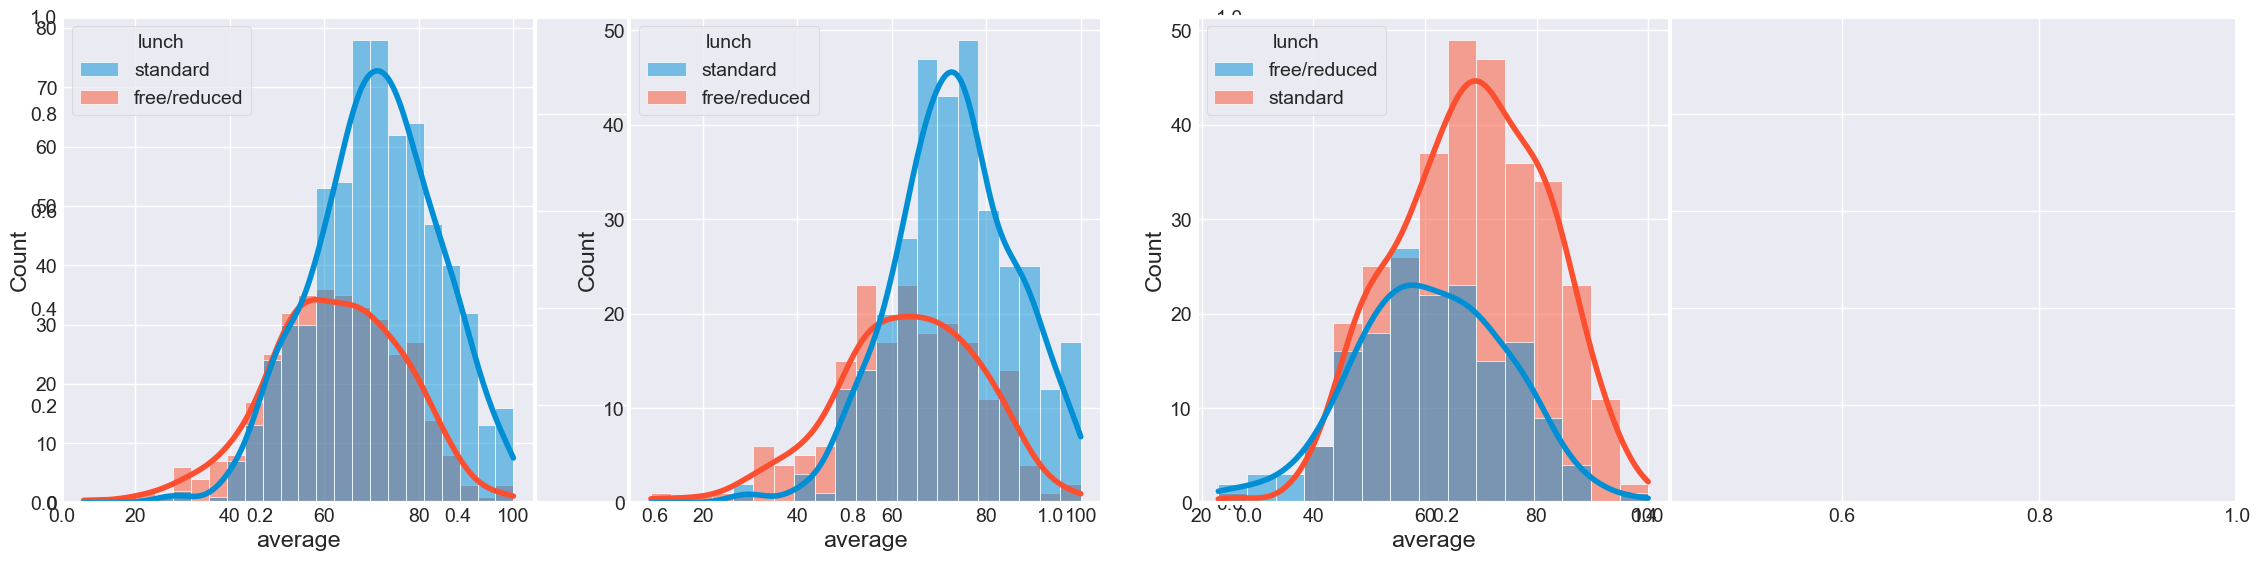

In [54]:
plt.subplots(1,2,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show

### Insights

* Standard lunch helps perform well in exams
* Standard lunch helps perform well in exams be it a male or a female

<function matplotlib.pyplot.show(close=None, block=None)>

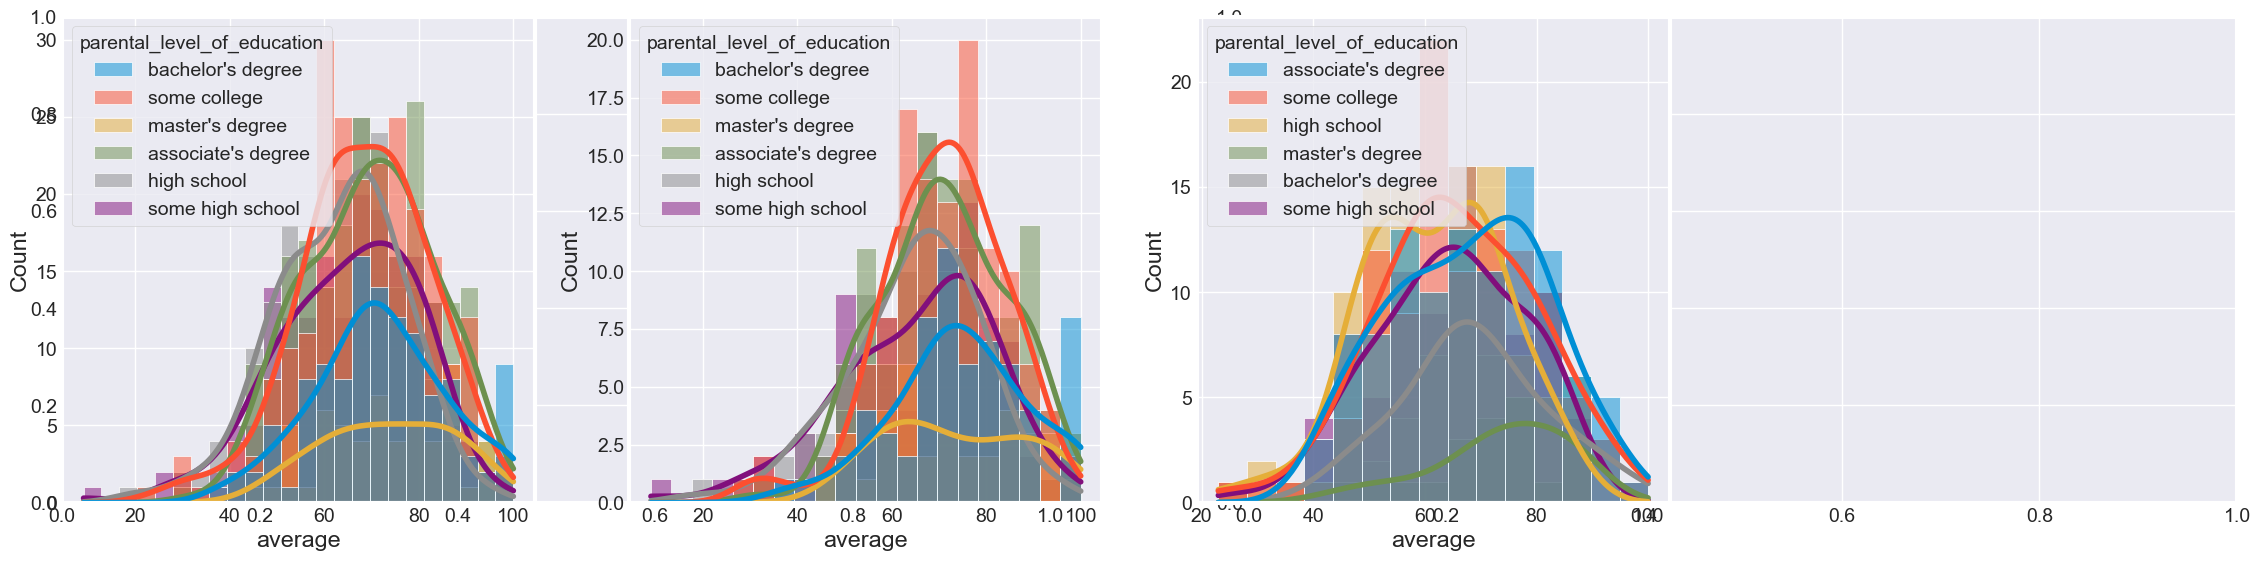

In [55]:
plt.subplots(1,2,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show

### Insights

* In general parent's education don't help student perform well in exam
* 2nd plot shows that parent's whose education is of associate's degree,or master's degree thier male child tend to perform well in exam
* 3nd plot show that parents education not affect the female performance in exam

<function matplotlib.pyplot.show(close=None, block=None)>

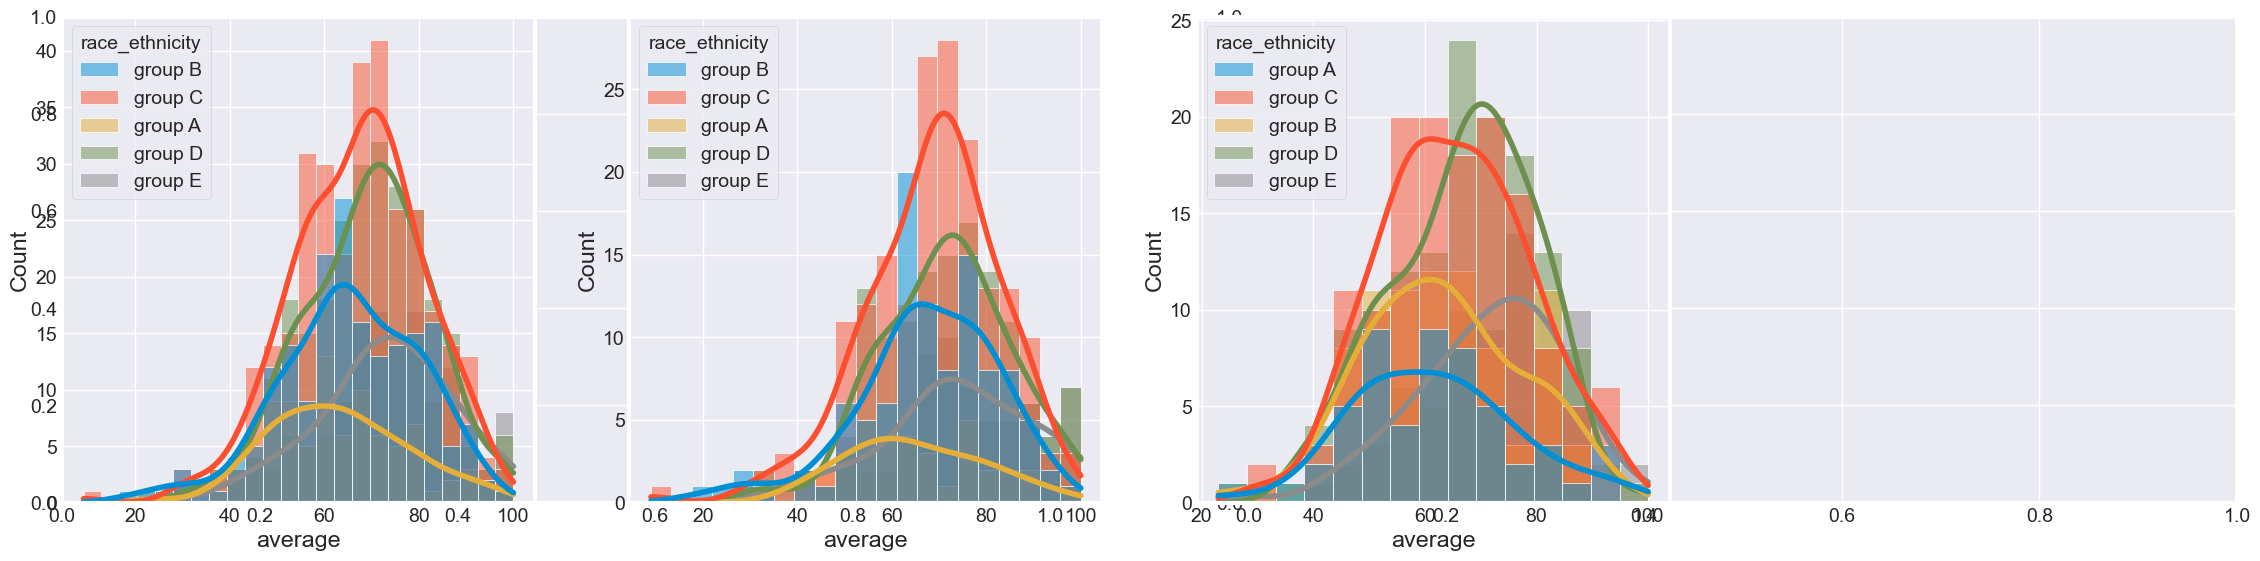

In [56]:
plt.subplots(1,2,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show

### Insights

* Students of group A and group B tends to perform poorly in exam
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

## 4.2 Maximum Score of students in all three subjects

<function matplotlib.pyplot.show(close=None, block=None)>

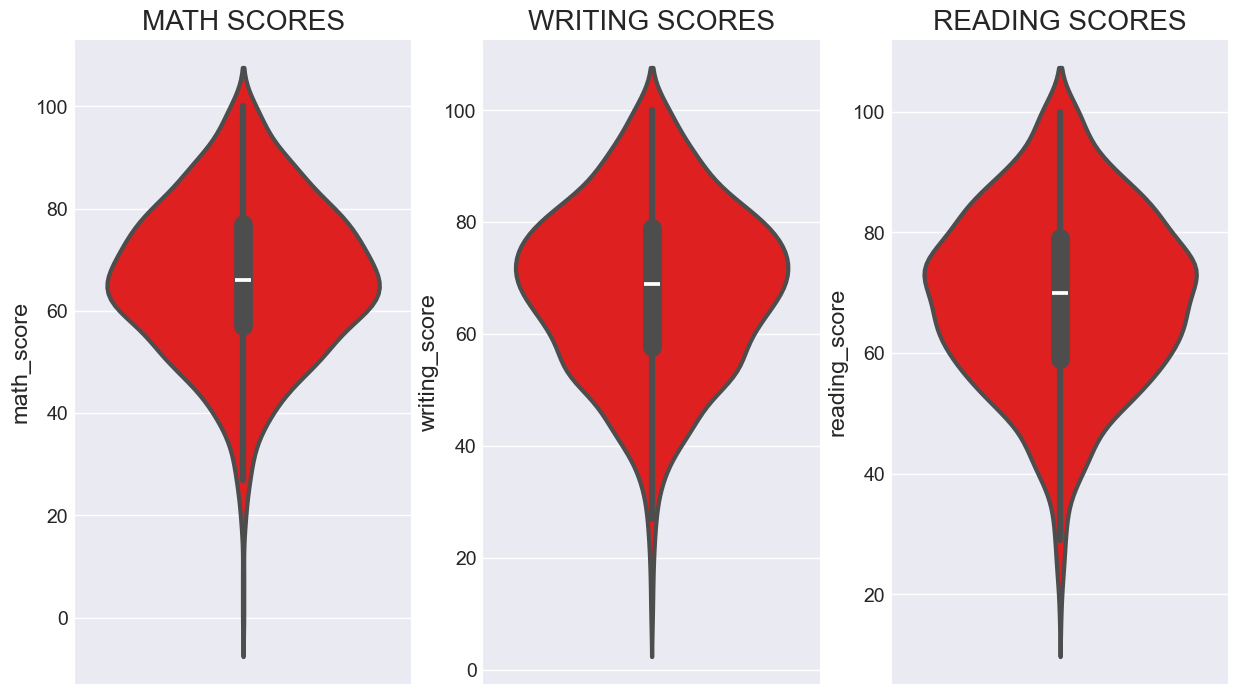

In [57]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)

plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)

plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,3)

plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='red',linewidth=3)
plt.show

### Insights

* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

## 4.3 Multivariate Analysis using pieplot

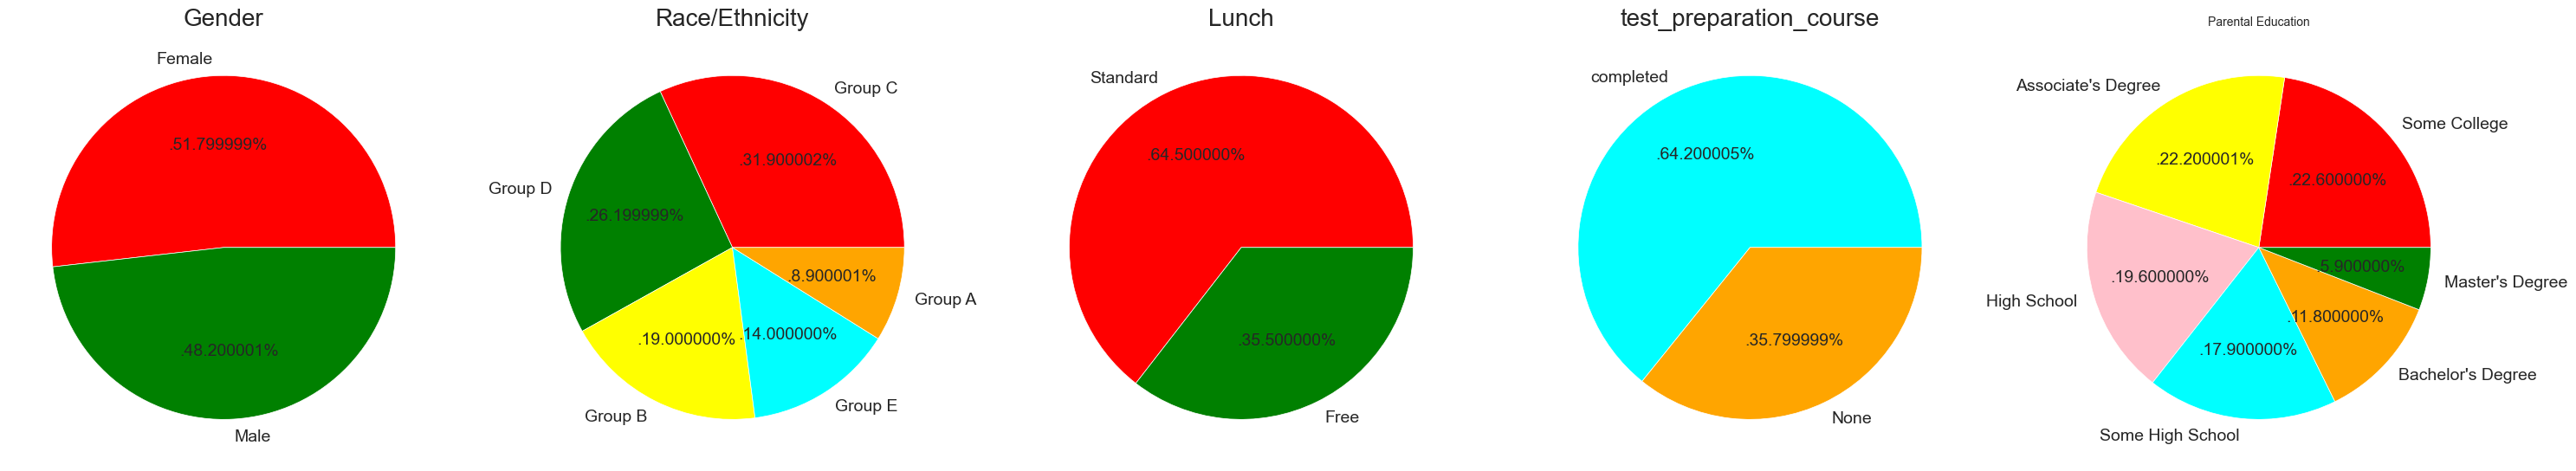

In [58]:
## Set figure size
plt.rcParams['figure.figsize'] = (30,12)

## Comment 1 - Gender Distribution
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = ('Female','Male')
color = ['red','green']

plt.pie(size , colors = color , labels = labels,autopct = '.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')


## Comment 2 - Race/Ethnicity Distribution
plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = ('Group C', 'Group D' , 'Group B' ,'Group E' ,'Group A')
color = ['red','green','yellow','cyan','orange']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')



## Comment 3 - Lunch Distribution
plt.subplot(1,5,3)
size  =df['lunch'].value_counts()
labels = ("Standard" , "Free")
color = ['red','green']

plt.pie(size ,colors = color,labels=labels ,autopct = '.%2f%%')
plt.title('Lunch',fontsize = 20)
plt.axis('off')


##Comment 4 - Test Preparation Course
plt.subplot(1,5,4)
size =df['test_preparation_course'].value_counts() 
labels = ('completed' , 'None')
color = ['cyan' , 'orange']


plt.pie(size ,colors = color,labels=labels ,autopct = '.%2f%%')
plt.title('test_preparation_course',fontsize = 20)
plt.axis('off')


## comment 5 - Parental Level Of Education
plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = ('Some College' ,"Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree")
color = ['red','yellow','pink','cyan','orange','green']

plt.pie(size,colors = color,labels= labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 10)
plt.axis('off')


## Adjust Layout and Show Plots
plt.tight_layout()
plt.grid()
plt.show()

### Insights

* Number of Males and Female Students is almost equal
* Number Students are greatest in Group C
* Number of Students who have started lunch are greater
* Number of Students who have not enrolled in any test preparation course is greater
* Number of Students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## 4.4 Feature Wise Visualization

### 4.4.1 GENDER COLUMN

* How is distribution of Gender ?
* Is gender has any impact on student's performance ?


## UNIVARIATE ANALYSIS (How Is Distribution of Gender ? )

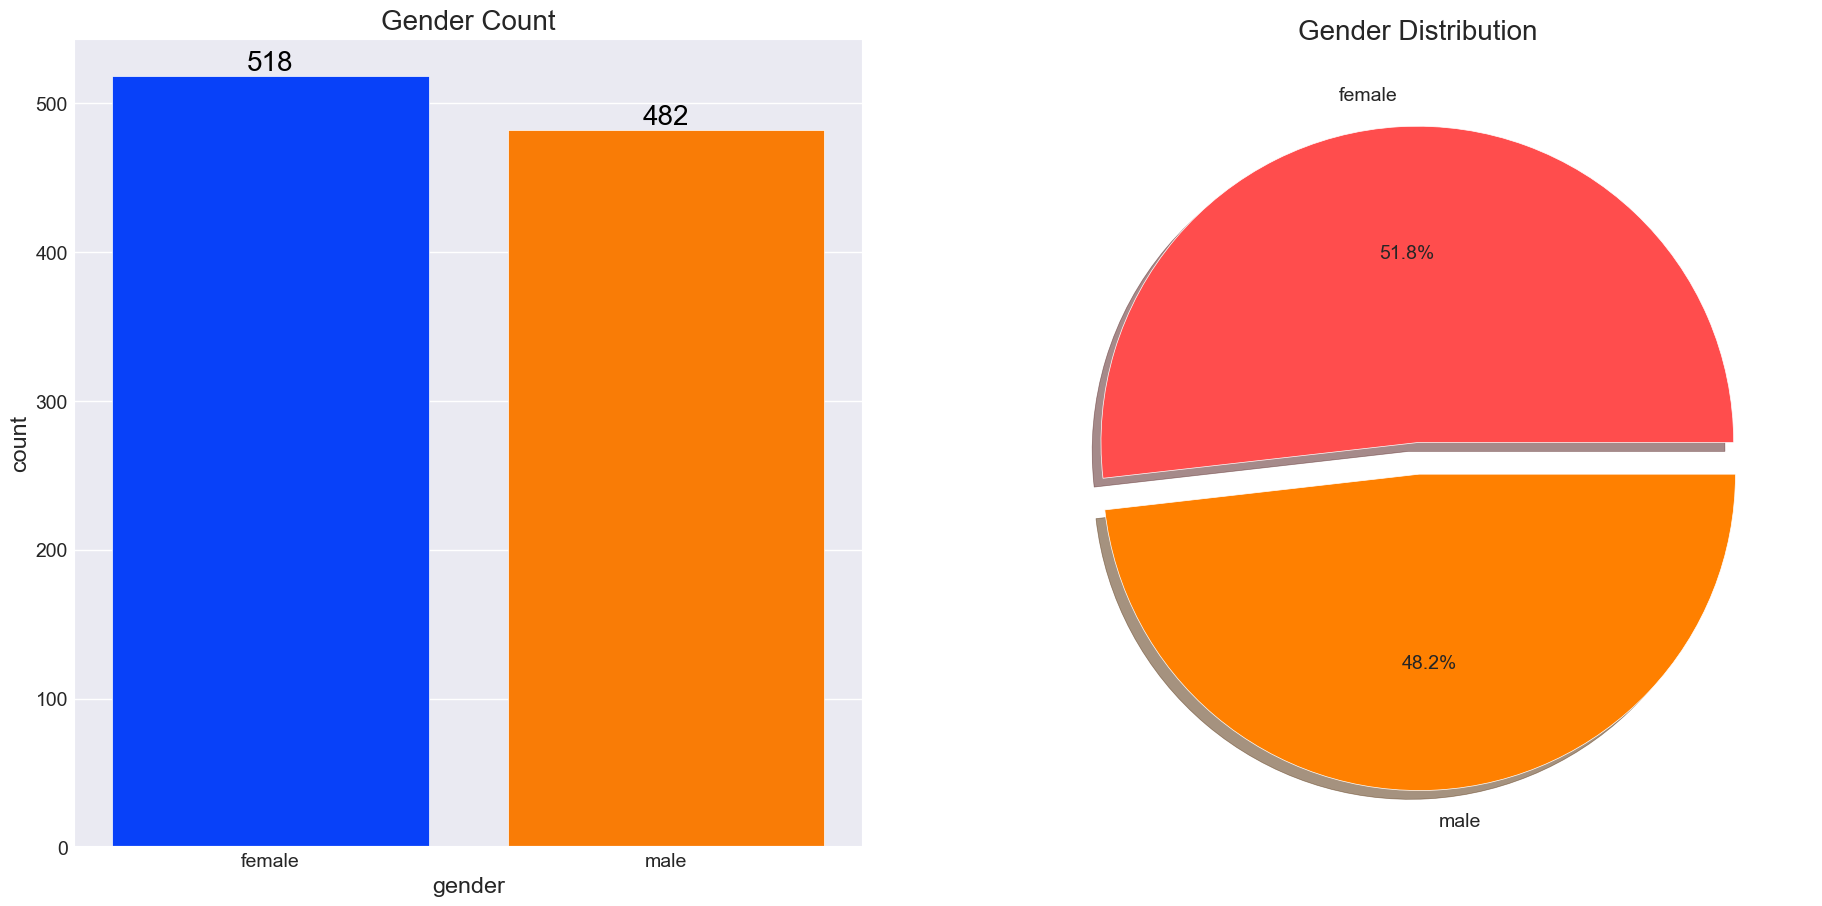

In [59]:
#Create a figure with two subplots
f,ax=plt.subplots(1,2,figsize=(20,10))

## First plot - Countplot of gender ##
# Countplot to slow the distribution of gender
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)

##Add labels on top of bars
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

## Title for the countplot
ax[0].set_title('Gender Count', fontsize=20)


## Second Plot - Pie Chart of Gender ##
# get gender value counts (Male & Female) dynamically
gender_counts = df['gender'].value_counts()


##Generate Pie Chart
ax[1].pie(
    x=gender_counts, # Data Values
    labels=gender_counts.index, # Labels (male and female)
    explode=[0,0.1], # slightly separate female slice
    autopct='%1.1f%%', # show percentage of values
    shadow=True, # Add shadow for 3d effect
    colors=['#ff4d4d','#ff8000'] #Custom Colors
)

#Title for Pie Chart
ax[1].set_title("Gender Distribution", fontsize=20)
plt.show()

### Insights

* Gender has balanced data with female students are 418 (48%) adn male students are 482 (52%)

## BIVARIATE ANALYSIS (Is gender has any impact on student's performance)

In [60]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


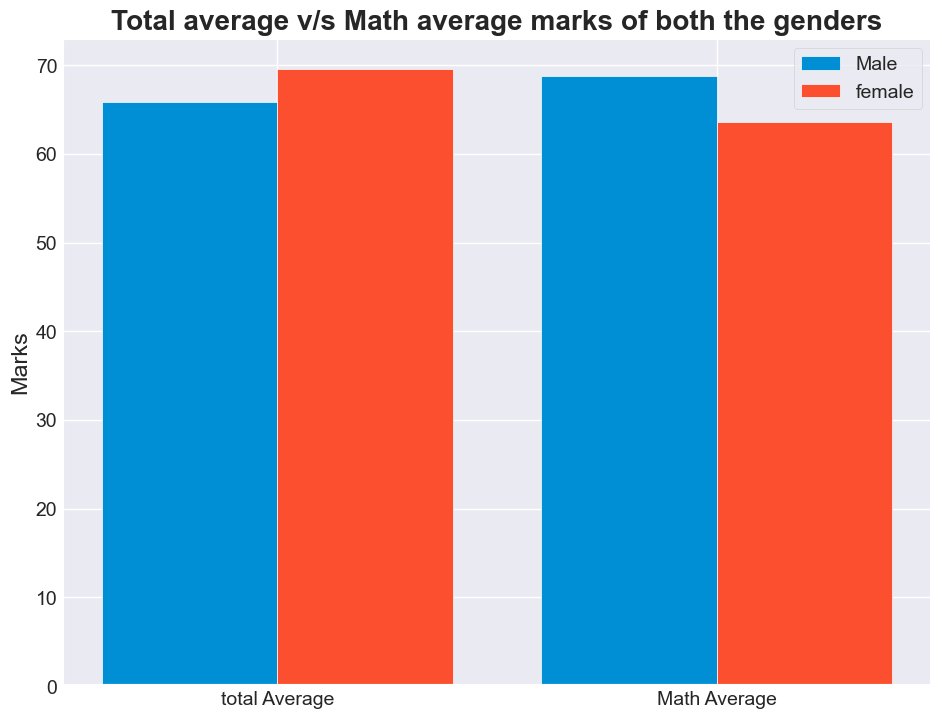

In [61]:

# set the figure size for better visualization
plt.figure(figsize=(10,8))

#define the categories for the x-axis
X = ['total Average','Math Average']

#Extract the average score of male and female under the gender_group Dataframe
female_score = [gender_group['average'][0], gender_group['math_score'][0]]
male_score = [gender_group['average'][1], gender_group['math_score'][1]]

#create the array of indices for the x-axis
X_axis = np.arange(len(X))

# plot the bar chart for female score, slighty shifted to left ( -0.2)
plt.bar(X_axis - 0.2 , male_score ,0.4 , label = 'Male')

#plot the bar chart for male score, slighty shifted to right (+ 0.2)
plt.bar(X_axis + 0.2 , female_score ,0.4 , label = 'female')

#Set the x-axis tick label for category names
plt.xticks(X_axis,X)

# Labels for y-axis
plt.ylabel("Marks")

#Title for the plot
plt.title("Total average v/s Math average marks of both the genders",fontweight='bold')

#Display the legend differentiation male and female
plt.legend()

#Show the plot
plt.show()

### Insights

* On an average females have a better overall score than men
* whereas males have scored higher in maths

## Race/Ethnicity Column

* How is group wise distribution ?
* Is race/Ethnicity has any impact on student's performance ?

## Univariate Analysis (How is Group wise distribution ?)

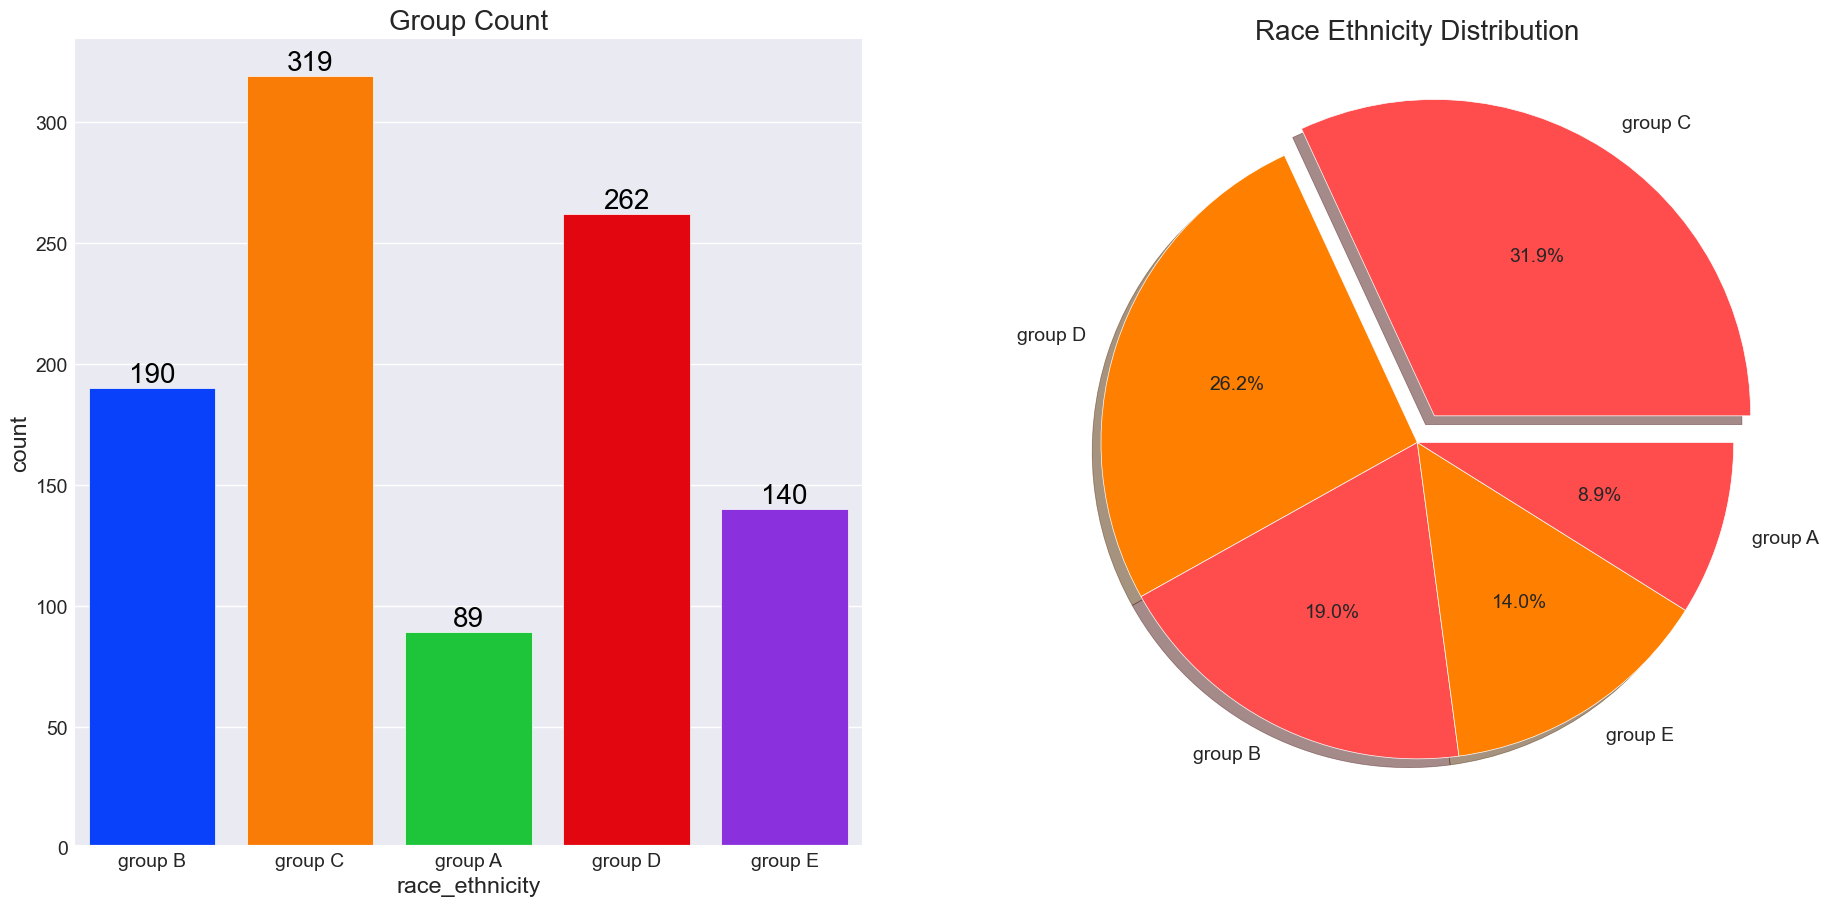

In [62]:
#Create a figure with two subplots
f,ax=plt.subplots(1,2,figsize=(20,10))

## First plot - Countplot of race_ethnicity ##
# Countplot to slow the distribution of race_ethnicity
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)

##Add labels on top of bars
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

## Title for the countplot
ax[0].set_title('Group Count', fontsize=20)


## Second Plot - Pie Chart of Gender ##
# get race/ethnicity value counts (A,B,C,D,E) dynamically
group_counts = df['race_ethnicity'].value_counts()


##Generate Pie Chart
ax[1].pie(
    x=group_counts, # Data Values
    labels=group_counts.index, # Labels (male and female)
    explode=[0.1,0,0,0,0], # slightly separate female slice
    autopct='%1.1f%%', # show percentage of values
    shadow=True, # Add shadow for 3d effect
    colors=['#ff4d4d','#ff8000'] #Custom Colors
)

#Title for Pie Chart
ax[1].set_title("Race Ethnicity Distribution", fontsize=20)
plt.show()

### Insights
* Most of the students belonging from group C/D.
* Lowest number of students belong to group A.

## BIVARIATE ANALYSIS (Is Race/Ethnicity has any impact on student's performance ?)

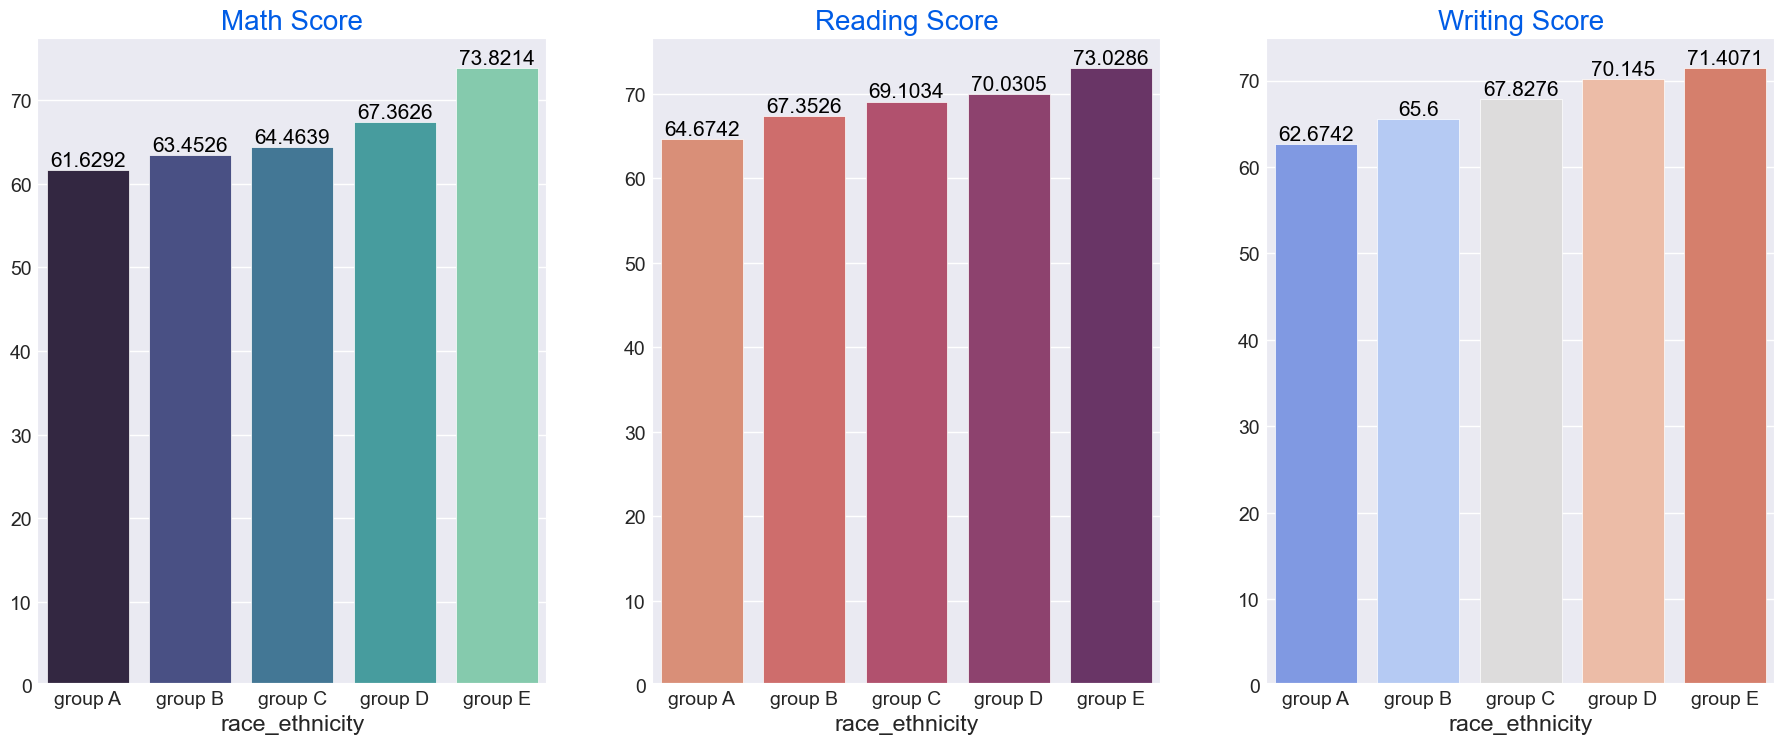

In [63]:
# Group the dataset by race/ethnicity
Group_data2 = df.groupby('race_ethnicity')

# Create a figure with three subplots (1 row, 3 columns) and set figure size
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# First subplot: Bar plot for average math scores by race/ethnicity
sns.barplot(x=Group_data2['math_score'].mean().index, 
            y=Group_data2['math_score'].mean().values, 
            palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)

# Add labels to bars in the first plot
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Second subplot: Bar plot for average reading scores by race/ethnicity
sns.barplot(x=Group_data2['reading_score'].mean().index, 
            y=Group_data2['reading_score'].mean().values, 
            palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)

# Add labels to bars in the second plot
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Third subplot: Bar plot for average writing scores by race/ethnicity
sns.barplot(x=Group_data2['writing_score'].mean().index, 
            y=Group_data2['writing_score'].mean().values, 
            palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)

# Add labels to bars in the third plot
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

# Show the plots
plt.show()


### Insights

* In All Subjects Group E score highest marks
* In All Subjects Group A score lowest marks
* Students from a lower Socioeconomic status have a lower avg in all course subjects

## 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

* What is educational background of student's parents ?
* Is parental education has any impact on student's performamce ?

### UNIVARIATE ANALYSIS (What is educational background of student's parents ?)

Text(0, 0.5, 'count')

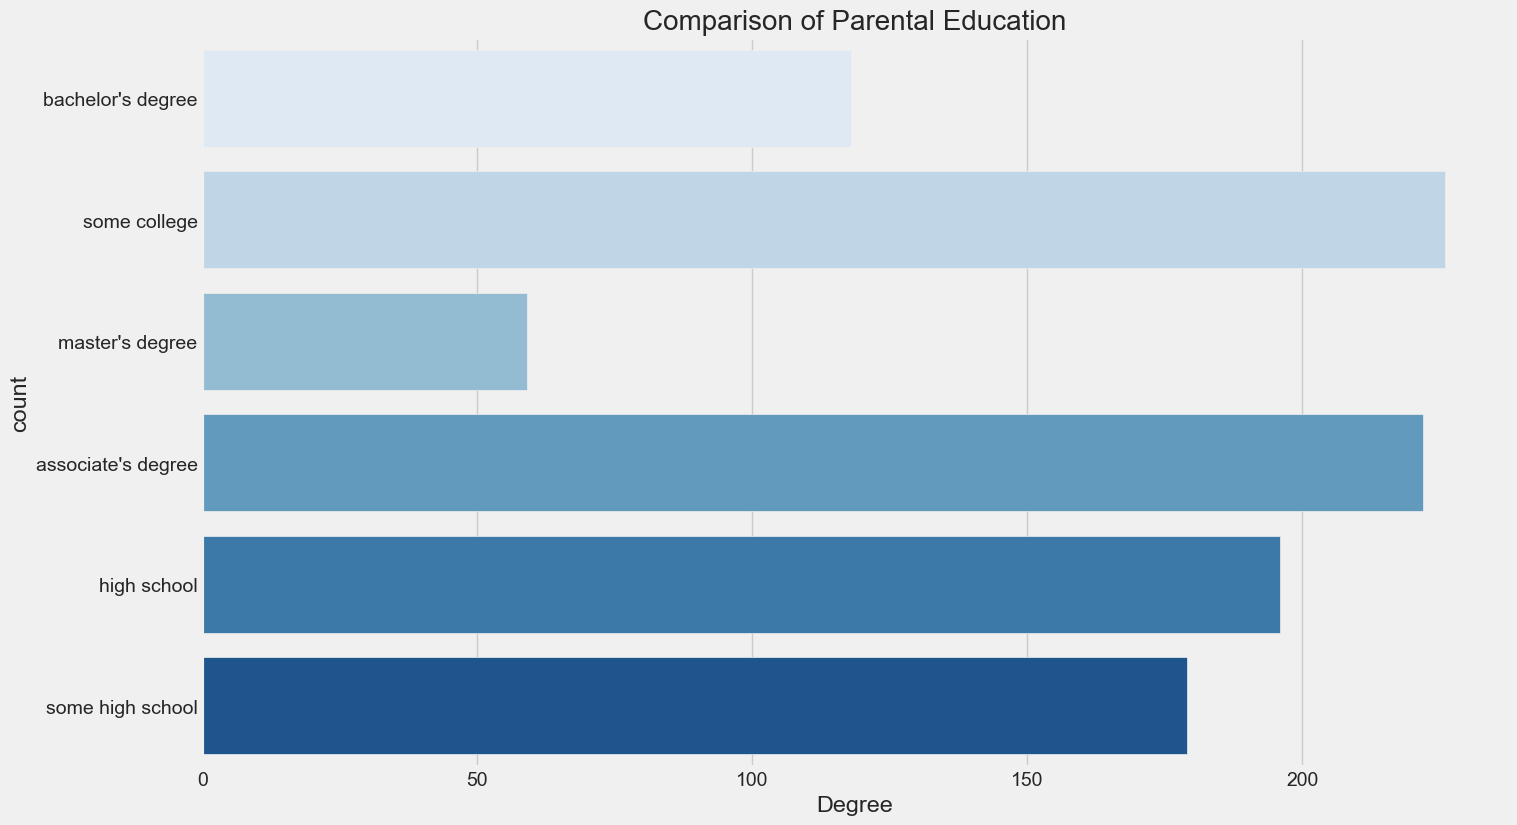

In [64]:
# set figure size for plot
plt.rcParams['figure.figsize'] = (15, 9)

#Use the 'fivethirtyeight' style for better aesthetic
plt.style.use('fivethirtyeight')

#Create a count plot for pareental level of education
sns.countplot(df['parental_level_of_education'], palette = 'Blues')

#Set title and axis levels
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')

### Insights

* Largest number of parents have some degrees
* Smallest number of parents have master degrees

### BIVARIATE ANALYSIS (Is parental education has any impact on student's performance ?)

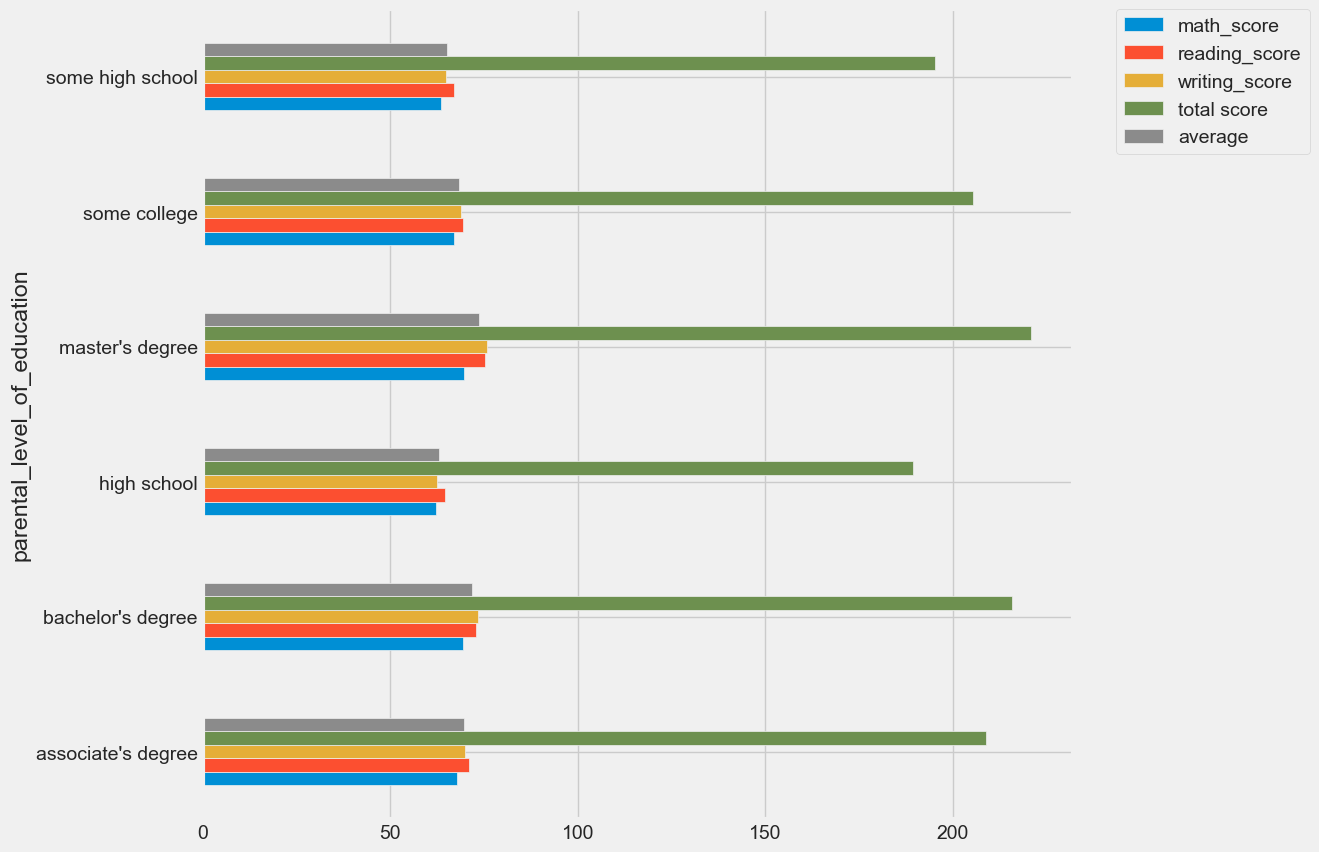

In [65]:
# Select only numeric columns for aggregation
numeric_cols = df.select_dtypes(include=['number'])

# Group the dataset by parental level of education and calculate the mean for each group
df.groupby('parental_level_of_education')[numeric_cols.columns].mean().plot(kind='barh', figsize=(10, 10))

# Adjust legend position to be outside the plot for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the plot
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

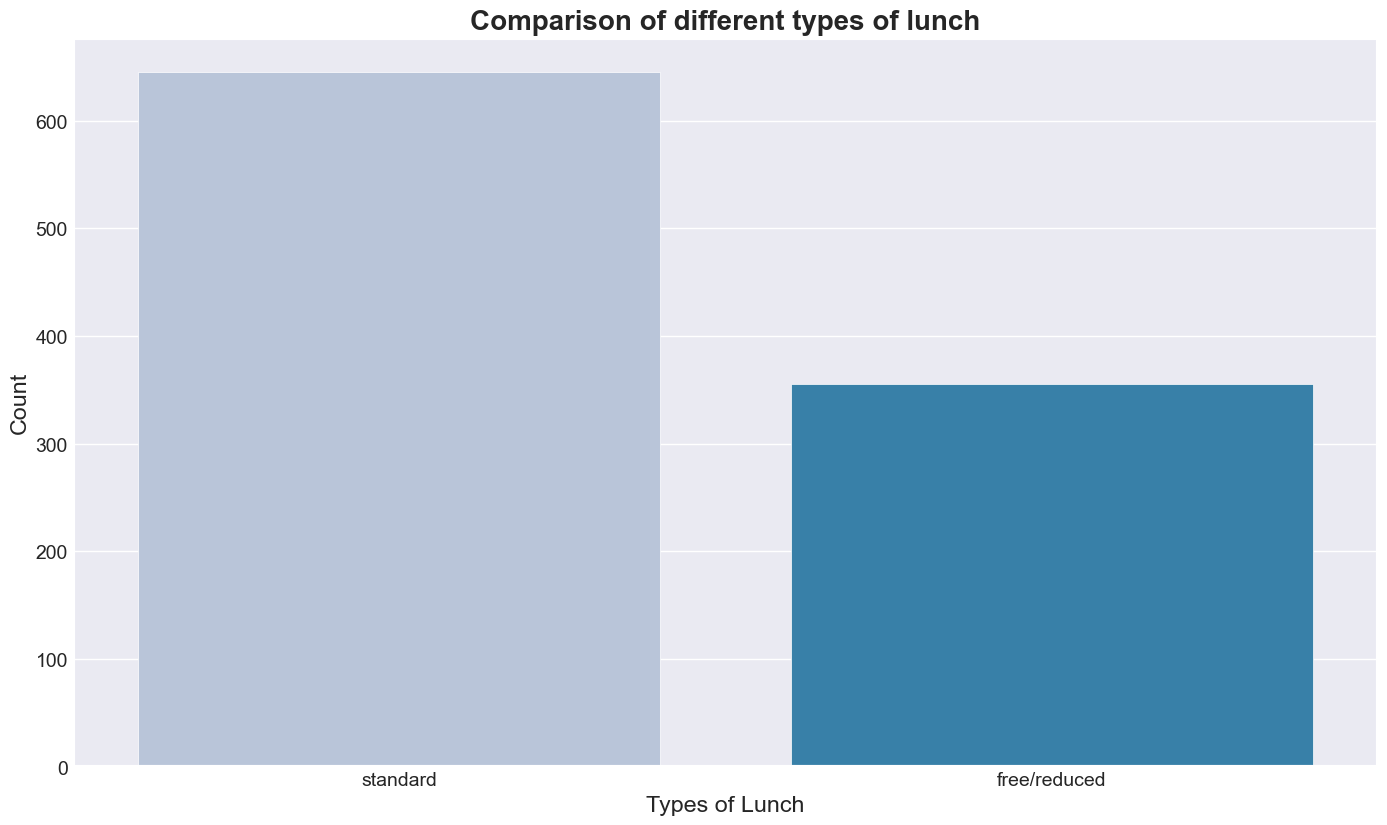

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 9)  # Set figure size

sns.set_style("darkgrid")  # Optional for a nicer look


# Create count plot
sns.countplot(x=df['lunch'], palette='PuBu')

# Set labels
plt.title('Comparison of different types of lunch', fontweight="bold", fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

# Show plot
plt.show()



#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

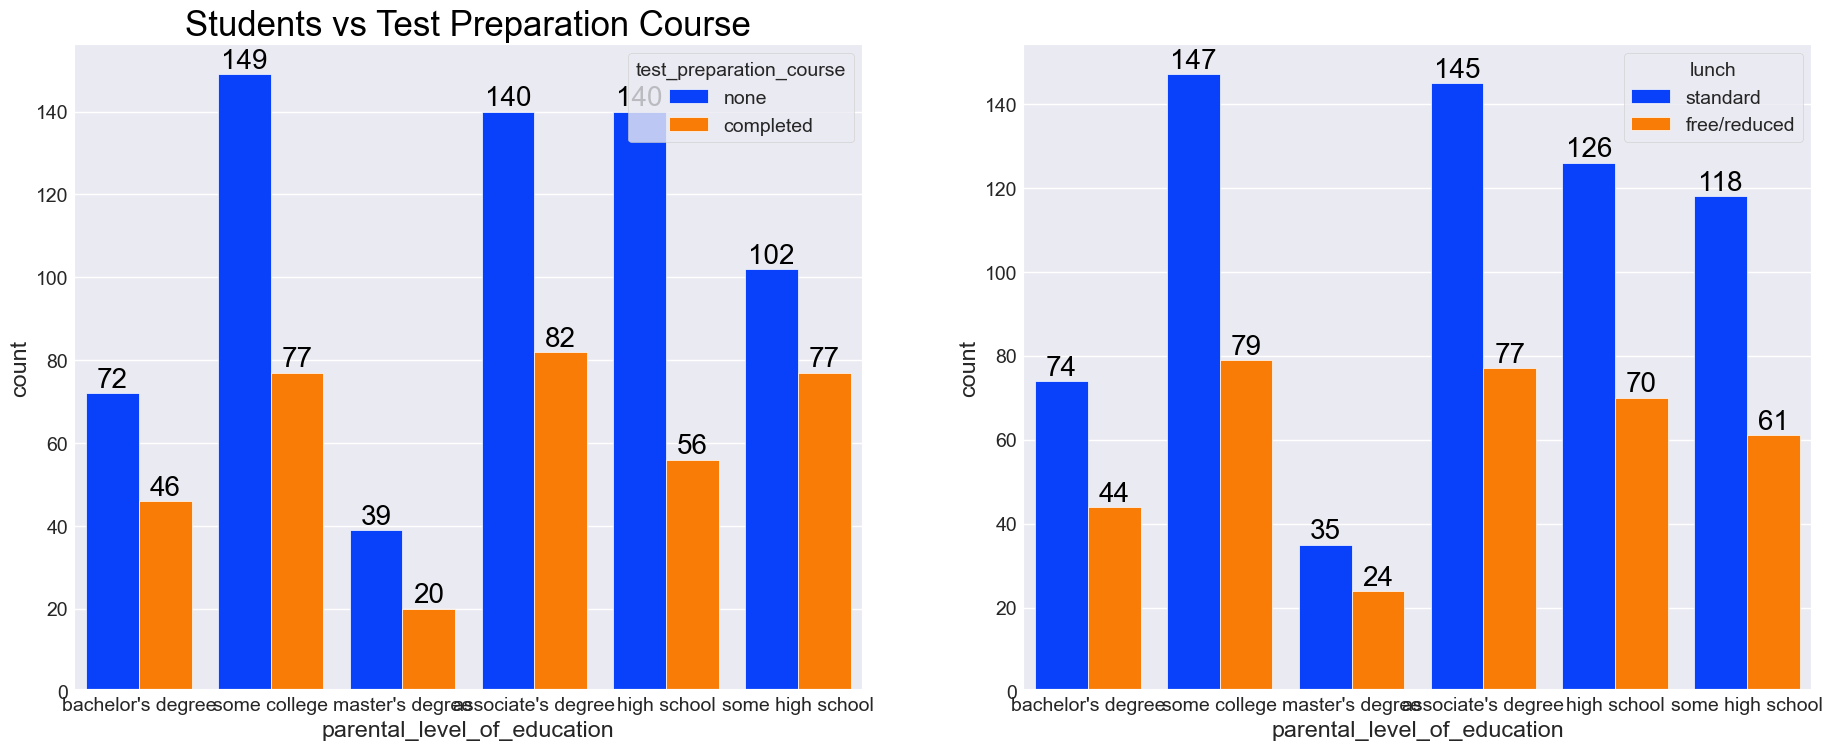

In [68]:
# Create a figure with 1 row and 2 columns of subplots, setting the total figure size to 20x8 inches
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First subplot: Count plot of parental education level vs. test preparation course
sns.countplot(x=df['parental_level_of_education'],  # X-axis: Parental education level
              data=df,  # Data source
              palette='bright',  # Use a bright color palette
              hue='test_preparation_course',  # Group bars by test preparation course
              saturation=0.95,  # Adjust color saturation
              ax=ax[0])  # Assign the plot to the first subplot

# Set title for the first plot
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)

# Add bar labels to the first plot
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Second subplot: Count plot of parental education level vs. lunch type
sns.countplot(x=df['parental_level_of_education'],  # X-axis: Parental education level
              data=df,  # Data source
              palette='bright',  # Use a bright color palette
              hue='lunch',  # Group bars by lunch type
              saturation=0.95,  # Adjust color saturation
              ax=ax[1])  # Assign the plot to the second subplot

# Add bar labels to the second plot
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

# Display the plots
plt.show()


#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch
- Whose Student Completed the course get low marks

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

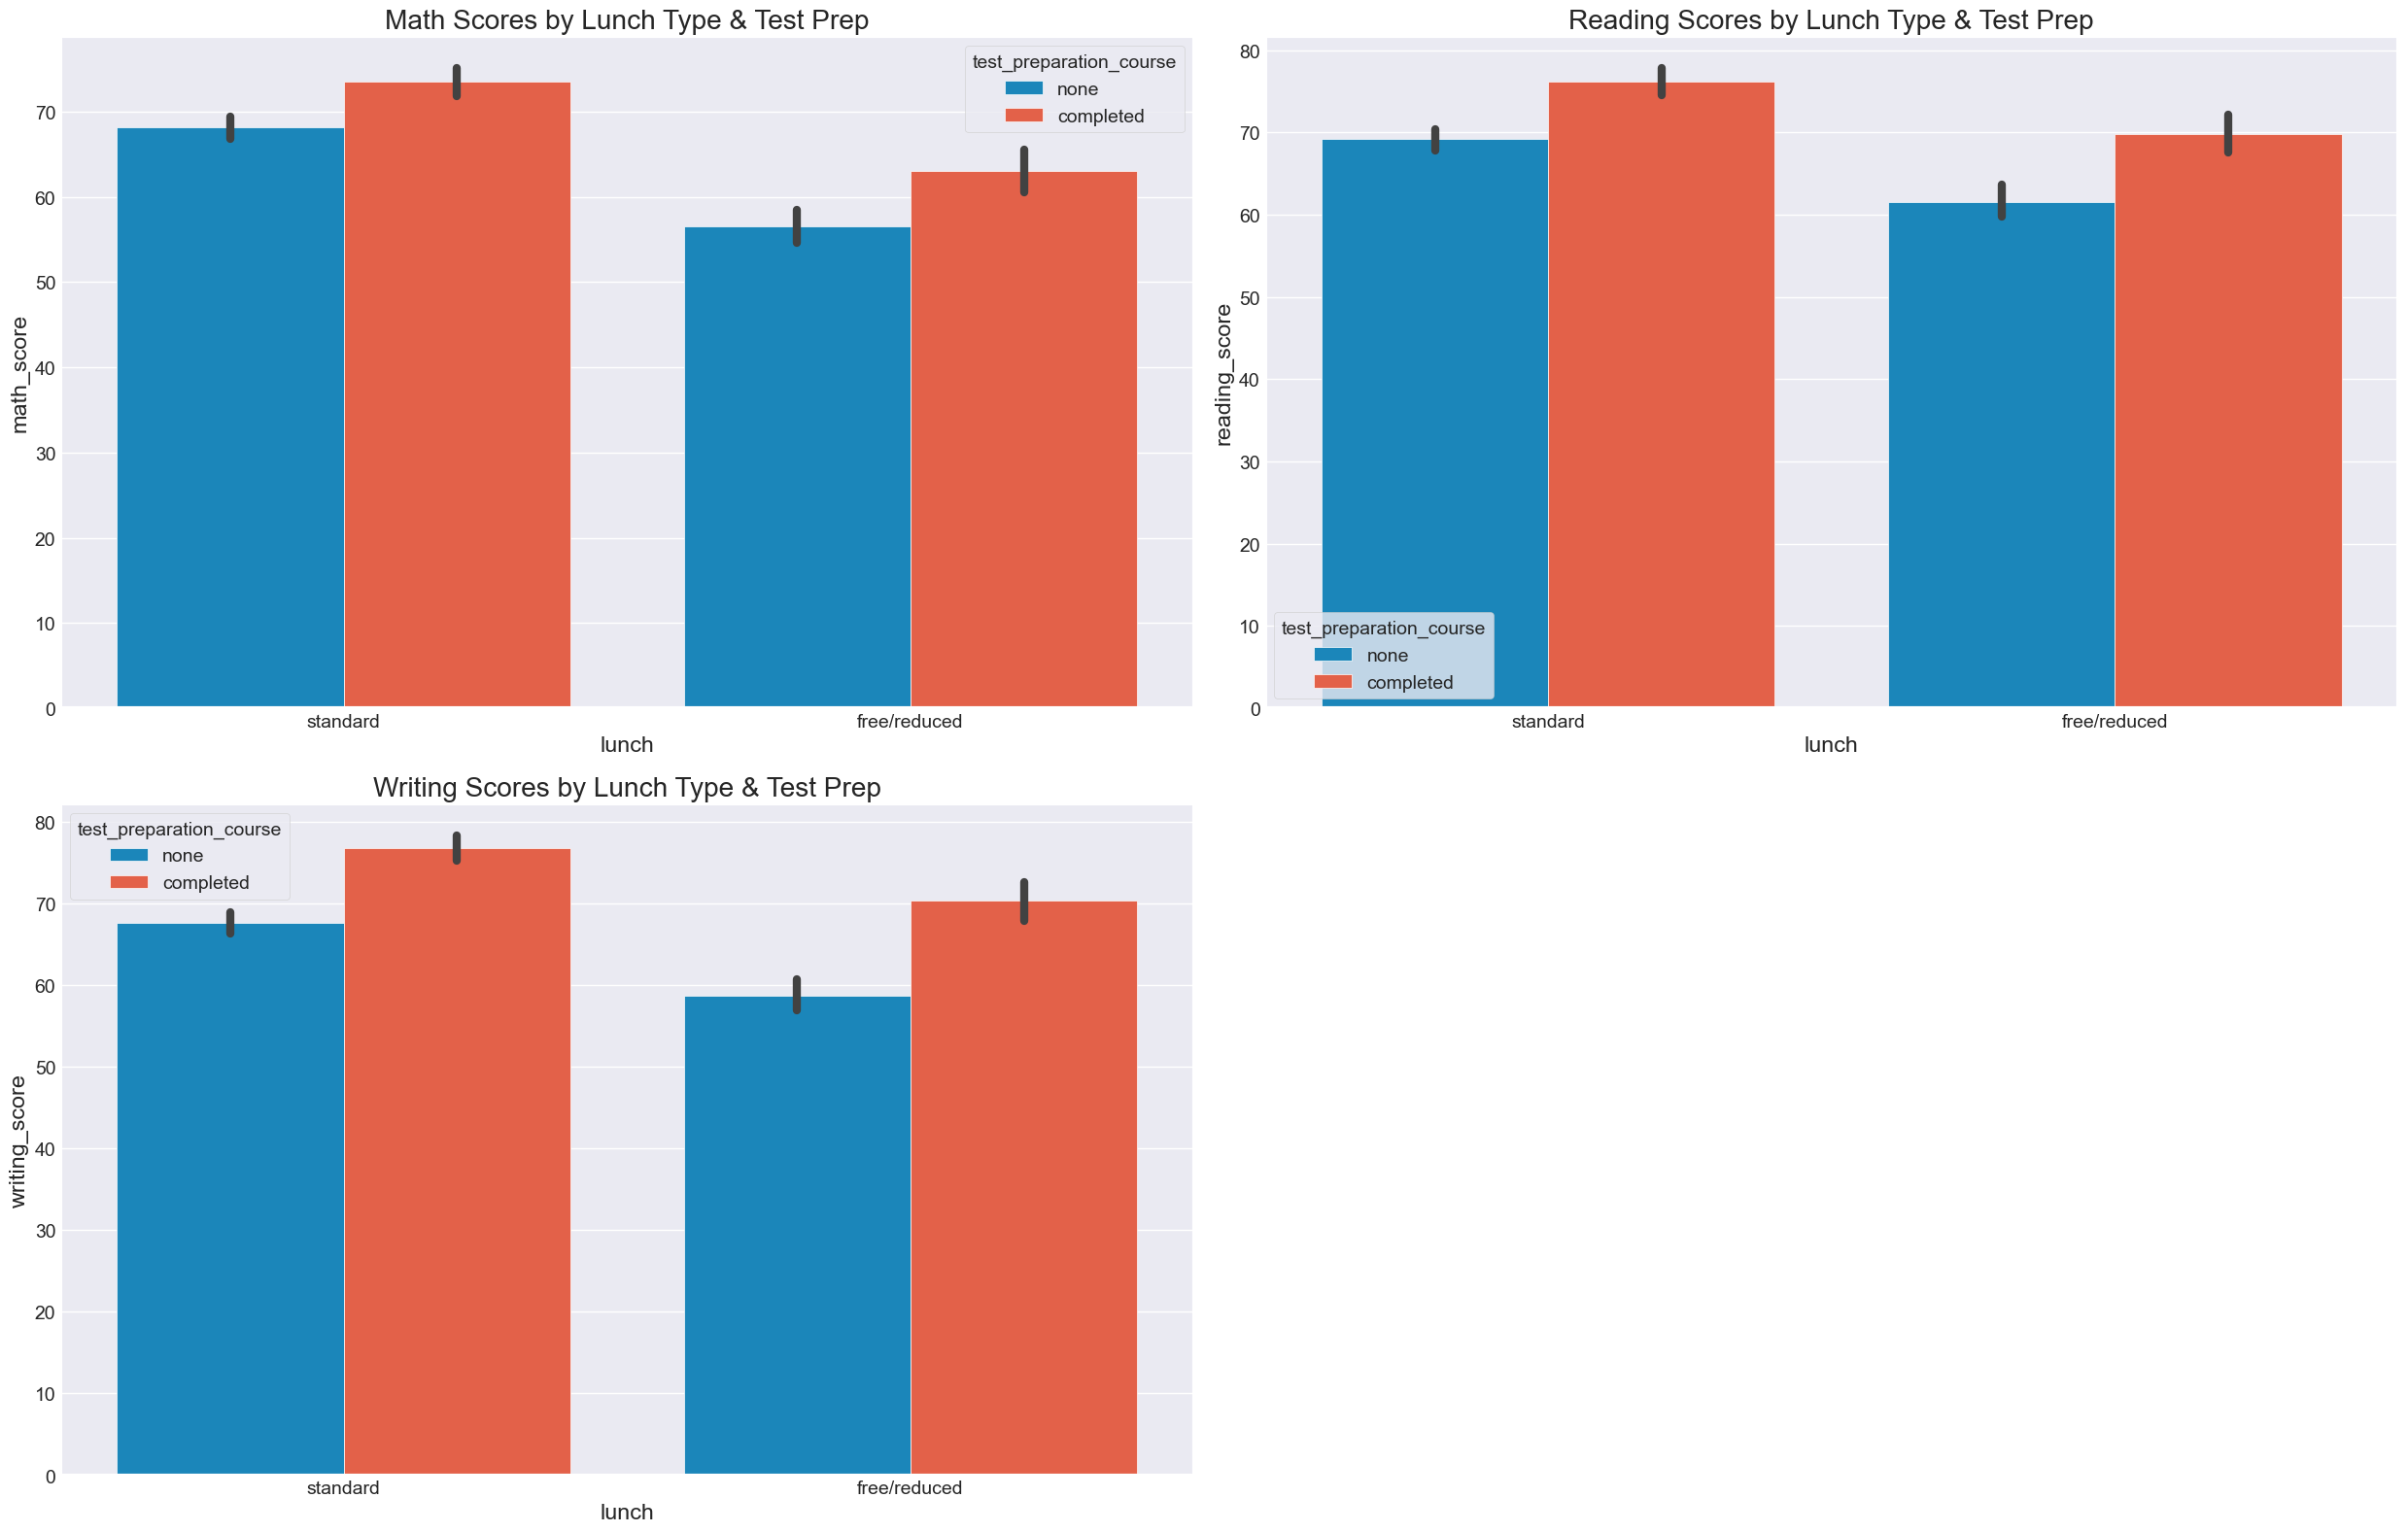

In [71]:
# Create a figure with a specified size of 12x6 inches
plt.figure(figsize=(25, 16))

# First subplot (Top-left): Math scores based on lunch type and test preparation course
plt.subplot(2, 2, 1)  # Define the first subplot in a 2x2 grid
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])  # Create a bar plot
plt.title("Math Scores by Lunch Type & Test Prep")  # Add a title for better understanding

# Second subplot (Top-right): Reading scores based on lunch type and test preparation course
plt.subplot(2, 2, 2)  # Define the second subplot in a 2x2 grid
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])  # Create a bar plot
plt.title("Reading Scores by Lunch Type & Test Prep")  # Add a title

# Third subplot (Bottom-left): Writing scores based on lunch type and test preparation course
plt.subplot(2, 2, 3)  # Define the third subplot in a 2x2 grid
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])  # Create a bar plot
plt.title("Writing Scores by Lunch Type & Test Prep")  # Add a title

# Adjust layout to prevent overlapping of plots
plt.tight_layout()

# Display the plots
plt.show()


#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

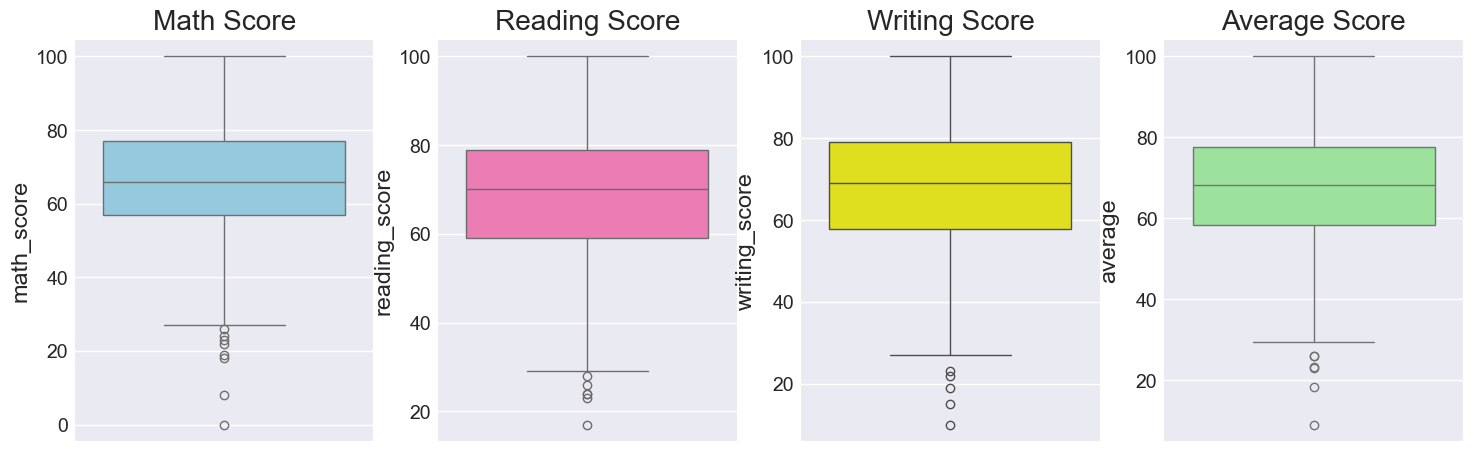

In [73]:
# Create a figure with 1 row and 4 columns of subplots, with a total figure size of 16x5 inches
plt.subplots(1, 4, figsize=(16, 5))

# First subplot (1st boxplot) - Math scores distribution
plt.subplot(141)  # Positioning the first subplot in a 1x4 grid
sns.boxplot(df['math_score'], color='skyblue')  # Create a boxplot for math scores
plt.title("Math Score")  # Add title for clarity

# Second subplot (2nd boxplot) - Reading scores distribution
plt.subplot(142)  # Positioning the second subplot in a 1x4 grid
sns.boxplot(df['reading_score'], color='hotpink')  # Create a boxplot for reading scores
plt.title("Reading Score")  # Add title

# Third subplot (3rd boxplot) - Writing scores distribution
plt.subplot(143)  # Positioning the third subplot in a 1x4 grid
sns.boxplot(df['writing_score'], color='yellow')  # Create a boxplot for writing scores
plt.title("Writing Score")  # Add title

# Fourth subplot (4th boxplot) - Average scores distribution
plt.subplot(144)  # Positioning the fourth subplot in a 1x4 grid
sns.boxplot(df['average'], color='lightgreen')  # Create a boxplot for average scores
plt.title("Average Score")  # Add title

# Display the plots
plt.show()


#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

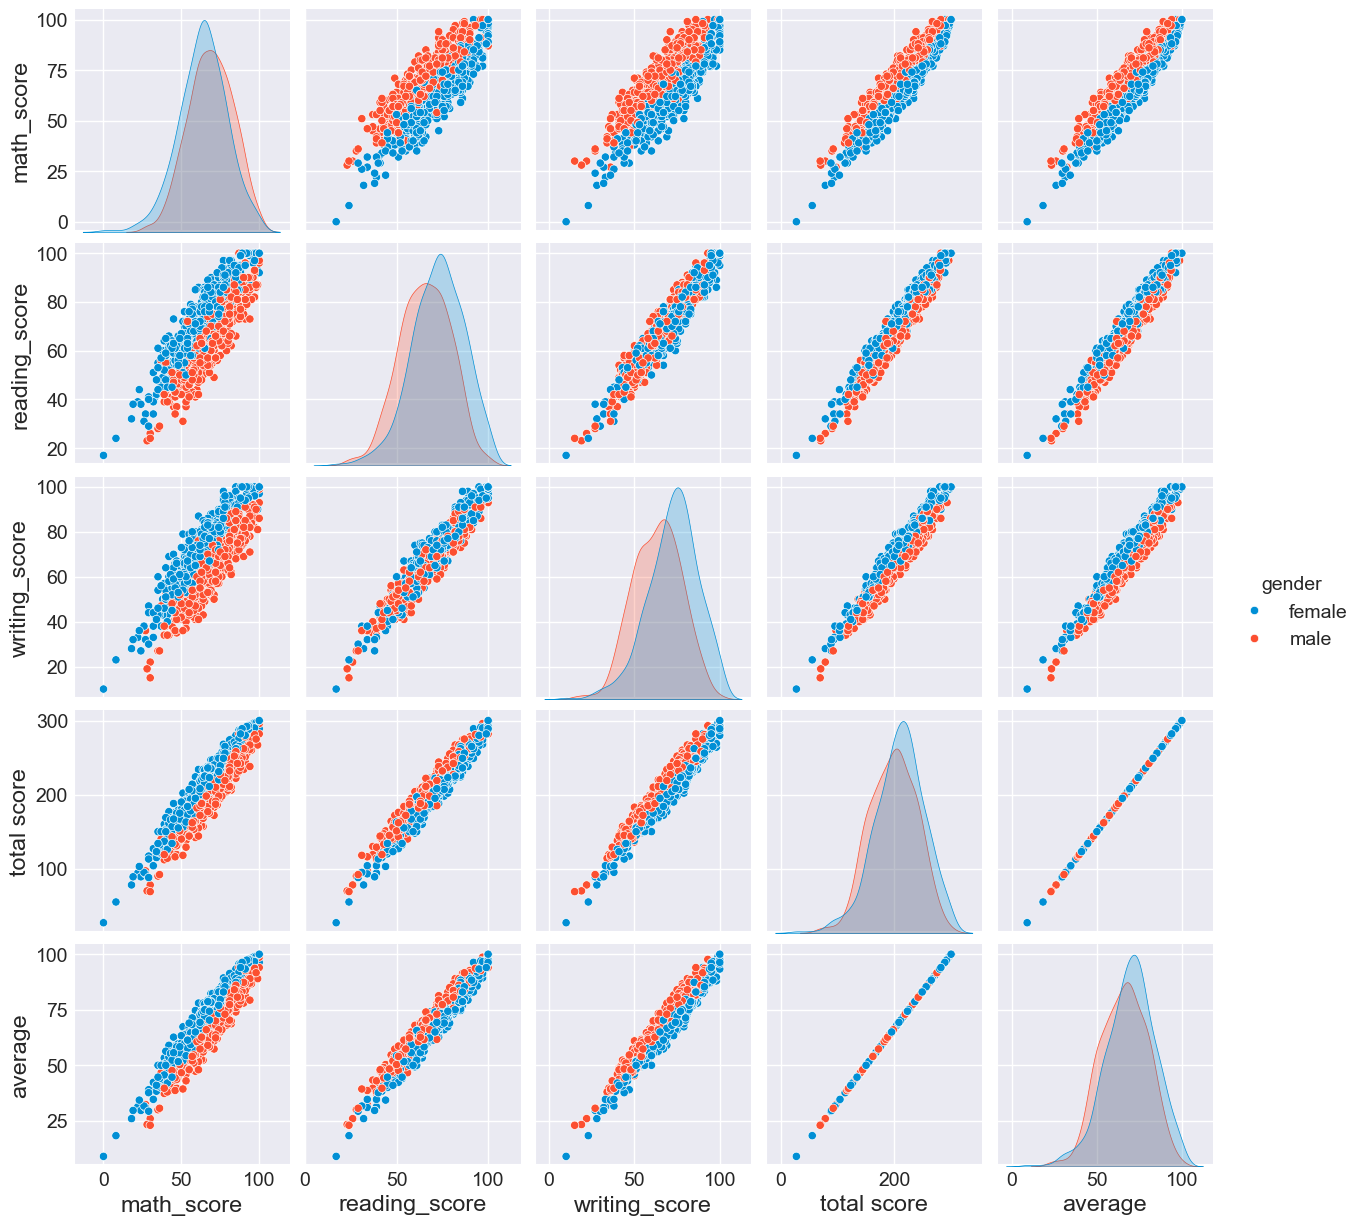

In [74]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.